In [1]:
import dutchsoils as ds

# DutchSoils structure
DutchSoils has one class `SoilProfile` which:  
* Can be acquired by location, soil profile index or BOFEK2020 cluster number.
* Gives chemical, physical and hydraulic parameters of the horizons in a soil profile.
* Plots the soil profile and chemical, physical and hydraulic information.
* Exports necessary data for [pyswap](https://github.com/zawadzkim/pySWAP).

## 1. Ways to obtain a SoilProfile

In [9]:
# Get a single profile by index number
ds.SoilProfile.from_index(9028040)

SoilProfile(index=9028040, code='bEZ23', name='Hoge bruine enkeerdgronden; lemig fijn zand', bofekcluster=3005, bofekcluster_name='Sterk lemige enkeerdgronden', bofekcluster_dominant=False, soilprofile_index=None, bofek_cluster=None)

In [12]:
# Get a single profile by code
ds.SoilProfile.from_code("Hn21")

SoilProfile(index=9014010, code='Hn21', name='Veldpodzolgronden; leemarm en zwak lemig fijn zand', bofekcluster=3015, bofekcluster_name='Zwak lemige zandgronden III', bofekcluster_dominant=False, soilprofile_index=None, bofek_cluster=None)

In [13]:
# Get a single profile from the BOFEK2020 clustering number
ds.SoilProfile.from_bofekcluster(1008)

SoilProfile(index=1230, code='kVz', name='Waardveengronden op zand, beginnend ondieper dan 1.2 m', bofekcluster=1008, bofekcluster_name='Dunne veengronden: kleibovengrond op veen op zand I', bofekcluster_dominant=True, soilprofile_index=None, bofek_cluster=None)

In [14]:
# The three options above can also receive list-like input
ds.SoilProfile.from_bofekcluster([1001, 2001, 3001])

[SoilProfile(index=1050, code='hVc', name='Koopveengronden op zeggeveen, rietzeggeveen of (mesotroof) broekveen', bofekcluster=1001, bofekcluster_name='Dikke veengronden: kleiig moerige bovengrond op bosveen', bofekcluster_dominant=True, soilprofile_index=None, bofek_cluster=None),
 SoilProfile(index=2040, code='zWp', name='Moerige podzolgronden met een humushoudend zanddek en een moerige tussenlaag', bofekcluster=2001, bofekcluster_name='Moerige gronden met zanddek', bofekcluster_dominant=True, soilprofile_index=None, bofek_cluster=None),
 SoilProfile(index=11021, code='Zn10Av', name='Kalkhoudende vlakvaaggronden; uiterst fijn zand', bofekcluster=3001, bofekcluster_name='Zandgronden (kalkrijk) met veenondergrond', bofekcluster_dominant=True, soilprofile_index=None, bofek_cluster=None)]

In [15]:
# Get a single profile from coordinates
ds.SoilProfile.from_location(
    x=171321.2,
    y=442308.1,
    crs="EPSG:28992",
)

SoilProfile(index=16170, code='Rn47Cp', name='Kalkloze poldervaaggronden; zware klei, profielverloop 3, of 3 en 4', bofekcluster=4008, bofekcluster_name='Kleigronden (klei) op zandondergrond I', bofekcluster_dominant=True, soilprofile_index=None, bofek_cluster=None)

In [16]:
# Get multiple profiles from coordinates
ds.SoilProfile.from_location(
    x=[171321.2, 169867.8],
    y=[442308.1, 440914.6],
    crs="EPSG:28992",
)

[SoilProfile(index=16170, code='Rn47Cp', name='Kalkloze poldervaaggronden; zware klei, profielverloop 3, of 3 en 4', bofekcluster=4008, bofekcluster_name='Kleigronden (klei) op zandondergrond I', bofekcluster_dominant=True, soilprofile_index=None, bofek_cluster=None),
 SoilProfile(index=3030, code='gY30', name='Holtpodzolgronden; grof zand', bofekcluster=3003, bofekcluster_name='Grofzandige zandgronden I', bofekcluster_dominant=False, soilprofile_index=None, bofek_cluster=None)]

## 2. Get data

In [ ]:
# Data of the soil horizons
sp = ds.SoilProfile.from_bofekcluster(1008)

# Get all available data
# An explanation of the column names is described in the documentation of the function.
sp.get_data_horizons(which="all")  # Also possible: "hydraulic", "chemical", "physical"

,layernumber,faohorizonnotation,ztop,zbottom,staringseriesblock,organicmattercontent,organicmattercontent10p,organicmattercontent90p,acidity,acidity10p,...,siltcontent,density,wcres,wcsat,vgmalpha,vgmnpar,vgmlambda,ksatfit,staringblockdescription,staringblocklabel
0,1,Ahg,0.00,0.10,B17,20.0,10.0,30.0,5.0,4.5,...,35,0.641,0.00,0.718626,0.019062,1.136658,0.000100,4.483735,venige klei,venige klei
1,2,Cwg,0.10,0.35,O13,7.0,5.0,30.0,5.0,4.5,...,35,1.044,0.01,0.573268,0.027854,1.079952,-6.091311,9.689291,zeer zware klei,z.zw. klei
2,3,Cw,0.35,0.80,O17,75.0,60.0,90.0,5.0,4.7,...,57,0.232,0.01,0.848635,0.011929,1.271536,-1.249300,3.402009,mesotroof en eutroof veen,meso-eutroof veen
3,4,BCb,0.80,0.95,O01,3.0,1.0,8.0,4.8,4.5,...,6,1.545,0.01,0.365847,0.015987,2.162751,2.867967,22.322154,leemarm zeer fijn tot matig fijn zand,leemarm z.f.-m.f. zand
4,5,Cu,0.95,1.20,O01,0.4,0.1,3.0,4.8,4.5,...,6,1.668,0.01,0.365847,0.015987,2.162751,2.867967,22.322154,leemarm zeer fijn tot matig fijn zand,leemarm z.f.-m.f. zand


## 3. Plot profile

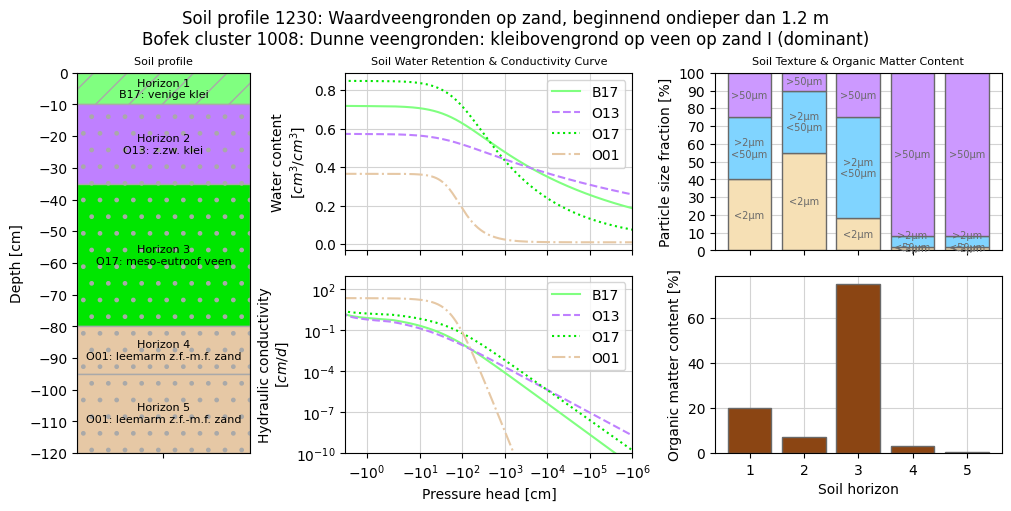

In [ ]:
sp.plot()

## 4. Get `pyswap` input data

In [19]:
# Get a discretisation of the profile
sp.get_swapinput_profile(
    discretisation_compheights=[1, 2, 5, 10, 20],
    discretisation_depths=[10, 20, 30, 40, 100]
)

{'ISUBLAY': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'ISOILLAY': [1, 2, 2, 3, 3, 4, 4, 5, 5],
 'HSUBLAY': [10, 20, 5, 25, 20, 5, 10, 5, 100],
 'HCOMP': [1, 2, 5, 5, 10, 5, 10, 5, 20],
 'NCOMP': [10, 10, 1, 5, 2, 1, 1, 1, 5]}